In [1]:
import os
os.environ['HTTP_PROXY'] = "http://127.0.0.1:10809"
os.environ['HTTPS_PROXY'] = "http://127.0.0.1:10809"

In [2]:
import geemap
import ee
Map=geemap.Map()
Map

*** Earth Engine *** FINAL DEADLINE: ee.Authenticate will fail after 2022-06-06. Please upgrade. https://developers.google.com/earth-engine/guides/python_install


Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [3]:
# 定义参数
# region = 'daqing'
# sample_region = 'DAQING'
# region = 'tianjin'
# sample_region = 'TIANJIN'
# region = 'wuhan'
# sample_region = 'WUHAN'
# region = 'prd'
# sample_region = 'PRD'
region = 'tibet'
sample_region = 'TIBET'

In [4]:
# # 大庆市
# roi = ee.Geometry.Rectangle([123.9355, 45.8362,125.3055, 46.8762])
# # 天津市
# roi = ee.Geometry.Rectangle([115.9244, 38.6272,117.4944,39.6372])
# # 武汉市
# roi = ee.Geometry.Rectangle([113.7393, 29.8642,115.0993, 30.9242])
# # 珠三角
# roi = ee.Geometry.Rectangle([112.7614, 22.2347,114.0514, 23.2547])
# 青藏高原
roi = ee.Geometry.Rectangle([89.8826, 34.6579,91.3626, 35.8279])
Map.addLayer(roi, {}, "roi")
Map.centerObject(roi,7)

# 实验

In [ ]:
re = [90.2278, 34.6615, 90.7370, 34.9208]
roi = ee.Geometry.Rectangle(re)

image1 = ee.Image("users/311605001111/vGLAD/water_individualMonthMaps_40N_080E_2015_07_percent")
image2 = ee.Image("users/311605001111/vGLAD/water_individualMonthMaps_40N_090E_2015_07_percent")
image = ee.ImageCollection([image1,image2]).mosaic().clip(roi)
nodata = image.lte(100).selfMask()
# .remap([0,1],[1,0])
final_image = image.updateMask(nodata)
Map.addLayer(final_image,{'palette':['white','blue'],'min':0,'max':100}, 'final_image')

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib

histogram = image.select('b1').reduceRegion(
    **{
        'reducer': ee.Reducer.histogram(255, 1),
        'geometry': roi,
        'scale': 10,
        'bestEffort': True,
    }
)
hist_dict = histogram.getInfo()

In [ ]:
fig = plt.figure(figsize=(12, 8))

x = hist_dict['b1']['bucketMeans']
y = hist_dict['b1']['histogram']
plt.bar(x, y)
plt.xlabel("water occurrence",size=18)
plt.ylabel("Number of pixels",size=18)
plt.title('2015/07')
plt.show()

In [ ]:
minmax = final_image.reduceRegion(**{
    'reducer': ee.Reducer.minMax(),
    'geometry': roi,
    'scale': 30,
    'maxPixels': 1e14,
})
print(minmax.getInfo())

In [ ]:
# # 有效像元
# from matplotlib import pyplot as plt
# import numpy as np
# import matplotlib
# from geemap import cartoee

# re = [89.8826, 34.6579,91.3626, 35.8279]
# fig = plt.figure(figsize=(12, 8))
# vis = {'min': 0,'max': 100,'palette':['#FFFFFF','#0000FF']}
# ax = cartoee.get_map(final_image,region=re,vis_params=vis)
# cartoee.add_gridlines(ax, interval=[0.3,0.2], linestyle=":")
# # cartoee.add_colorbar(ax, vis,cmap = 'Blues',loc="bottom",label="water frequency", orientation="horizontal")

# ax.set_title(label = 'GSWD', fontsize=20)

# 循环

## 白到蓝

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
from geemap import cartoee

year = '2020'

for i in range(1,10,1):
    re = [90.7370, 34.6615, 90.2278, 34.9208]
    roi = ee.Geometry.Rectangle(re)
    
    image1 = ee.Image('users/311605001111/vGLAD/water_individualMonthMaps_40N_080E_'+ year +'_0'+ str(i) +'_percent')
    image2 = ee.Image('users/311605001111/vGLAD/water_individualMonthMaps_40N_090E_'+ year +'_0'+ str(i) +'_percent')
    image = ee.ImageCollection([image1,image2]).mosaic().clip(roi)
    nodata = image.lte(100).selfMask()
    final_image = image.updateMask(nodata)

    fig = plt.figure(figsize=(12, 8))
    visParams = {'min': 0.0,'max': 100,'palette':['#FFFFFF','#0000FF']}
    ax = cartoee.get_map(final_image,region=re,vis_params=visParams)
    cartoee.add_gridlines(ax, interval=[0.1,0.1], linestyle=":")
    ax.set_title(label = 'GLAD (' + year +'/' + str(i) + ')', fontsize=20)

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
from geemap import cartoee

year = '2000'

for i in range(10,13,1):
    re = [90.7370, 34.6615, 90.2278, 34.9208]
    roi = ee.Geometry.Rectangle(re)
    
    image1 = ee.Image('users/311605001111/vGLAD/water_individualMonthMaps_40N_080E_'+ year +'_'+ str(i) +'_percent')
    image2 = ee.Image('users/311605001111/vGLAD/water_individualMonthMaps_40N_090E_'+ year +'_'+ str(i) +'_percent')
    image = ee.ImageCollection([image1,image2]).mosaic().clip(roi)
    nodata = image.lte(100).selfMask()
    final_image = image.updateMask(nodata)

    fig = plt.figure(figsize=(12, 8))
    visParams = {'min': 0.0,'max': 100,'palette':['#FFFFFF','#0000FF']}
    ax = cartoee.get_map(final_image,region=re,vis_params=visParams)
    cartoee.add_gridlines(ax, interval=[0.1,0.1], linestyle=":")
    ax.set_title(label = 'GLAD (' + year +'/' + str(i) + ')', fontsize=20)

## GnBu

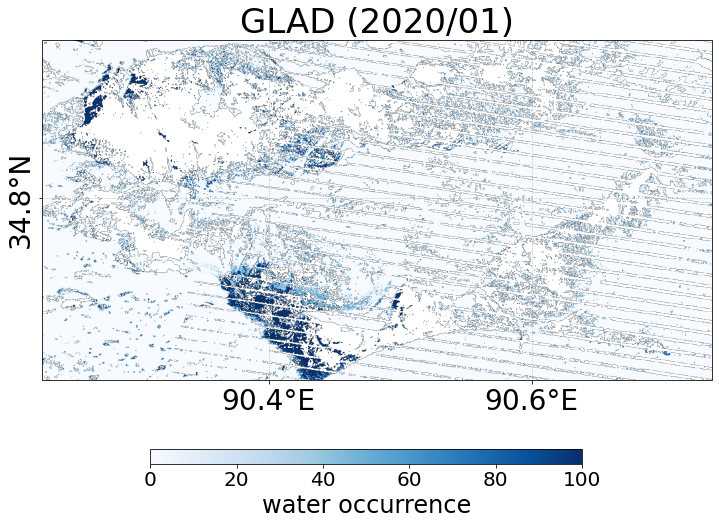

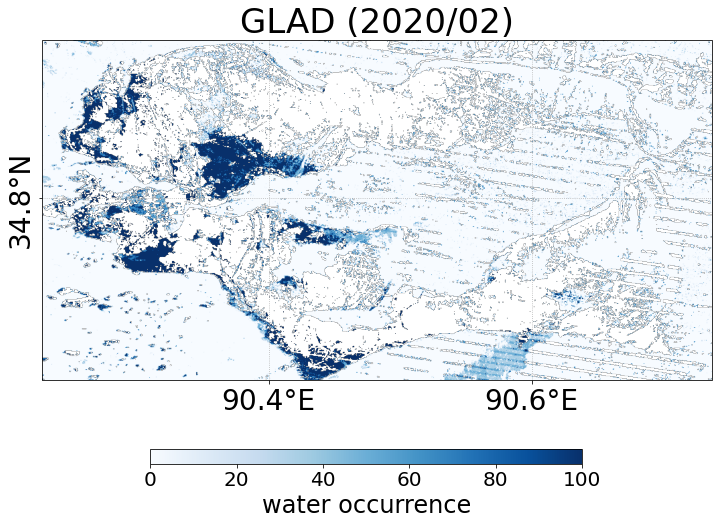

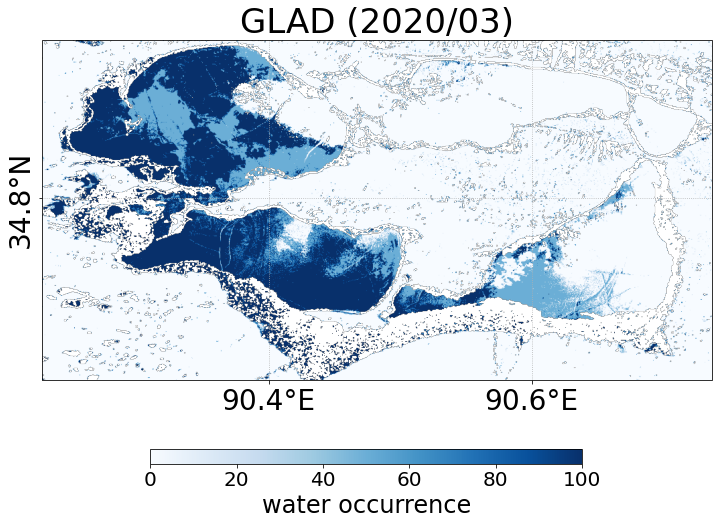

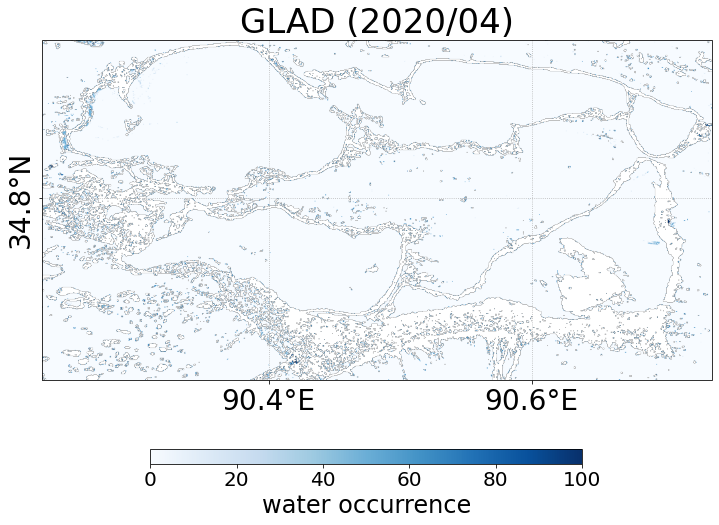

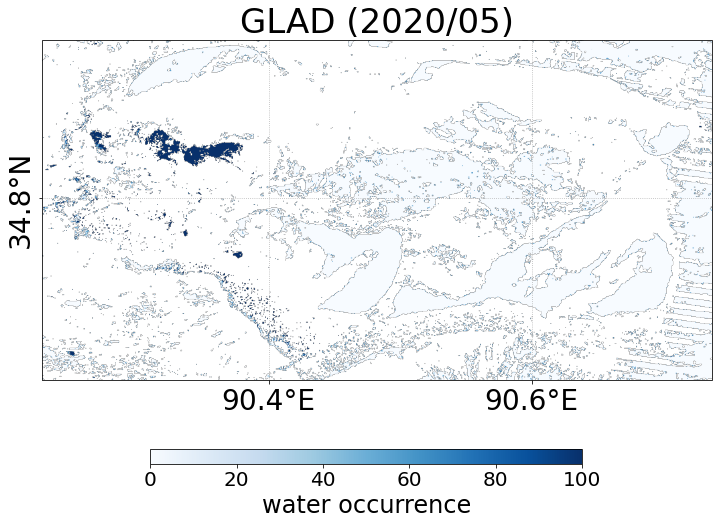

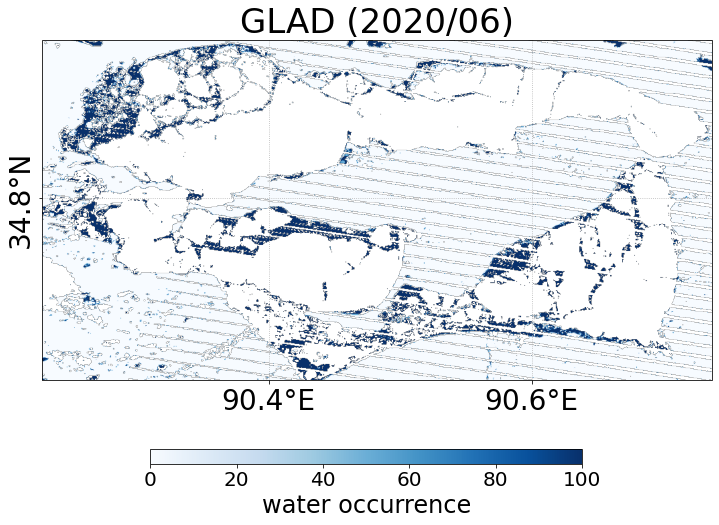

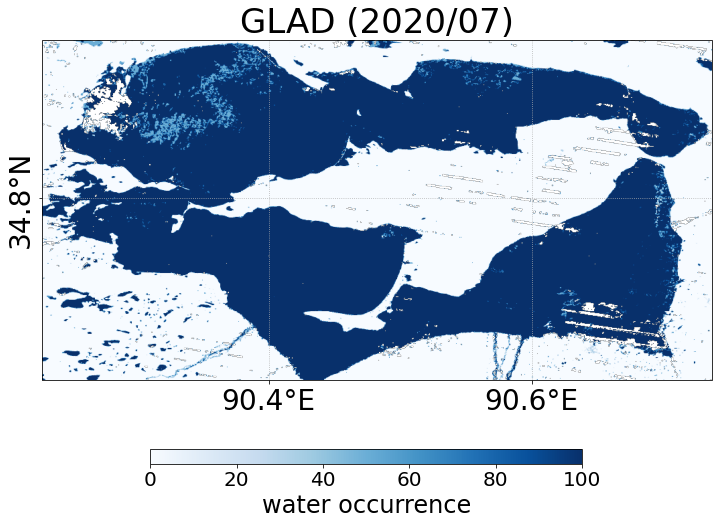

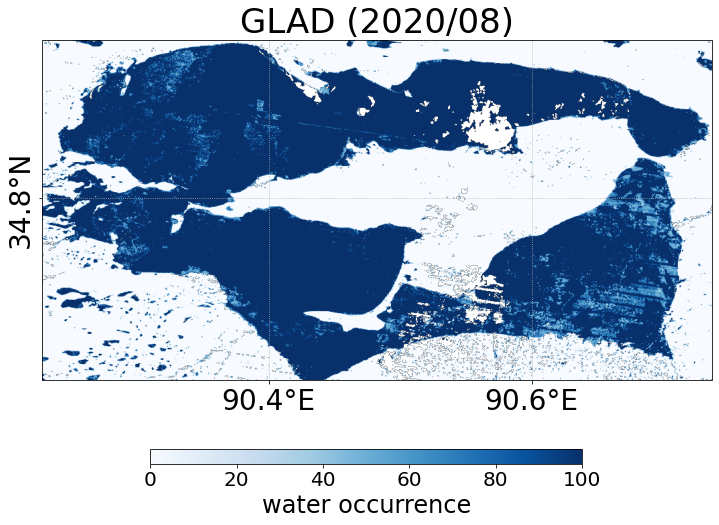

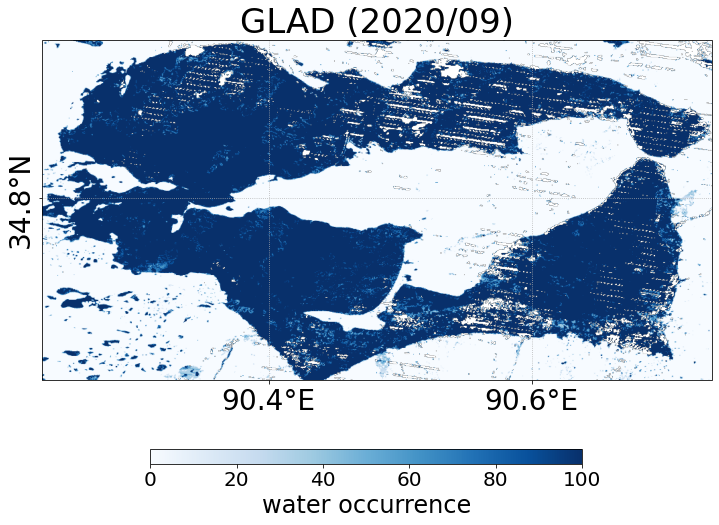

In [19]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
from geemap import cartoee

year = '2020'

for i in range(1,10,1):
    re = [90.7370, 34.6615, 90.2278, 34.9208]
    roi = ee.Geometry.Rectangle(re)
    
    image1 = ee.Image('users/311605001111/vGLAD/water_individualMonthMaps_40N_080E_'+ year +'_0'+ str(i) +'_percent')
    image2 = ee.Image('users/311605001111/vGLAD/water_individualMonthMaps_40N_090E_'+ year +'_0'+ str(i) +'_percent')
    image = ee.ImageCollection([image1,image2]).mosaic().clip(roi)
    nodata = image.lte(100).selfMask()
    final_image = image.updateMask(nodata)

    fig = plt.figure(figsize=(12, 10))
    visParams = {'min': 0.0,'max': 100}
    ax = cartoee.get_map(final_image,cmap="GnBu",region=re,vis_params=visParams)
    cartoee.add_colorbar(ax, visParams,cmap = 'GnBu',loc="bottom",label="water occurrence", orientation="horizontal", tick_font_size=20, label_font_size=24)
    # ax = cartoee.get_map(final_image,cmap="Blues",region=re,vis_params=visParams)
    # cartoee.add_colorbar(ax, visParams,cmap = 'Blues',loc="bottom",label="water occurrence", orientation="horizontal", tick_font_size=20, label_font_size=24)
    
    cartoee.add_gridlines(ax, interval=[0.2,0.2], linestyle=":", ytick_rotation="vertical")
    ax.tick_params(labelsize=28)
    ax.set_title(label = 'GLAD (' + year +'/0' + str(i) + ')', fontsize=34)

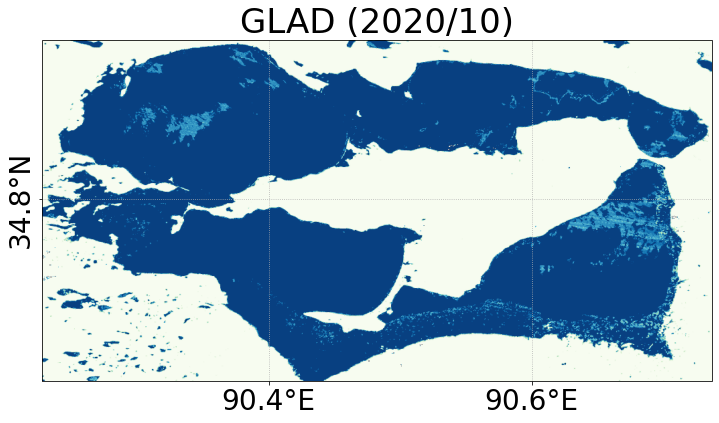

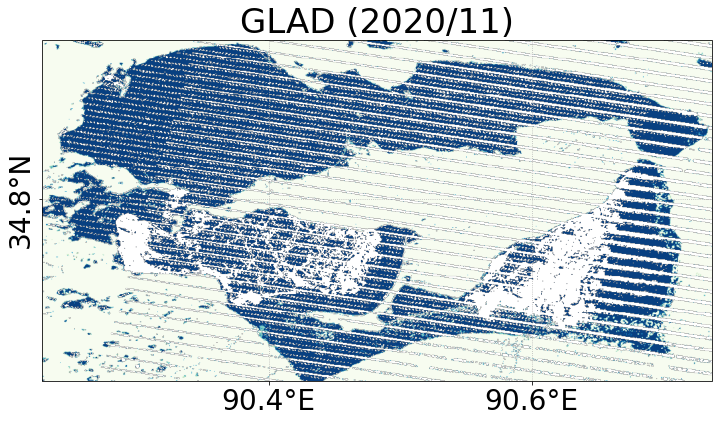

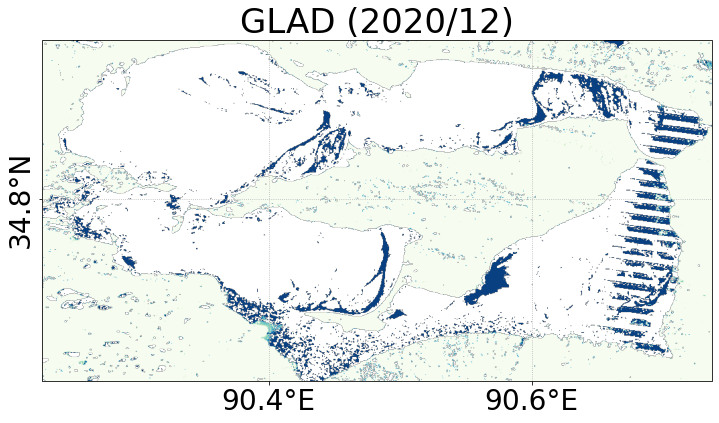

In [12]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
from geemap import cartoee

year = '2020'

for i in range(10,13,1):
    re = [90.7370, 34.6615, 90.2278, 34.9208]
    roi = ee.Geometry.Rectangle(re)
    
    image1 = ee.Image('users/311605001111/vGLAD/water_individualMonthMaps_40N_080E_'+ year +'_'+ str(i) +'_percent')
    image2 = ee.Image('users/311605001111/vGLAD/water_individualMonthMaps_40N_090E_'+ year +'_'+ str(i) +'_percent')
    image = ee.ImageCollection([image1,image2]).mosaic().clip(roi)
    nodata = image.lte(100).selfMask()
    final_image = image.updateMask(nodata)

    fig = plt.figure(figsize=(12, 8))
    visParams = {'min': 0.0,'max': 100}
    ax = cartoee.get_map(final_image,cmap="GnBu",region=re,vis_params=visParams)
    cartoee.add_gridlines(ax, interval=[0.2,0.2], linestyle=":", ytick_rotation="vertical")
    ax.tick_params(labelsize=28)
    ax.set_title(label = 'GLAD (' + year +'/' + str(i) + ')', fontsize=34)

In [ ]:
# 旧的

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
from geemap import cartoee

year = '2015'

for i in range(10,13,1):
    re = [90.7370, 34.6615, 90.2278, 34.9208]
    roi = ee.Geometry.Rectangle(re)
    
    image1 = ee.Image('users/311605001111/vGLAD/water_individualMonthMaps_40N_080E_'+ year +'_'+ str(i) +'_percent')
    image2 = ee.Image('users/311605001111/vGLAD/water_individualMonthMaps_40N_090E_'+ year +'_'+ str(i) +'_percent')
    image = ee.ImageCollection([image1,image2]).mosaic().clip(roi)
    nodata = image.lte(100).selfMask()
    final_image = image.updateMask(nodata)

    fig = plt.figure(figsize=(12, 8))
    vis = {'min': 0,'max': 100,'palette':['#D4D4D4','#0000FF']}
    ax = cartoee.get_map(final_image.visualize(**vis),region=re)
    cartoee.add_gridlines(ax, interval=[0.1,0.1], linestyle=":")
    ax.set_title(label = 'GLAD (' + year +'/' + str(i) + ')', fontsize=20)

# JRC

In [ ]:
# 1-9月
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
from geemap import cartoee

# region E
re = [90.7370, 34.6615, 90.2278, 34.9208]
roi = ee.Geometry.Rectangle(re)

for month in range(1,10,1):
    year = '2015'
    basemap = ee.Image.constant(0).clip(roi).rename('waterclass')
    JRC = ee.Image('JRC/GSW1_3/MonthlyHistory/' + year + '_0' + str(month)).clip(roi).rename('waterclass').selfMask()
    label = 'GSWD ('+ year +'/0'+ str(month) + ")" 
    
    fig = plt.figure(figsize=(12, 8))
    visParams = {'min': 1,'max': 2}
    ax = cartoee.get_map(JRC,cmap="GnBu",region=re,vis_params=visParams)
    cartoee.add_gridlines(ax, interval=[0.1,0.1], linestyle=":")
    ax.set_title(label = label, fontsize=28)

In [ ]:
# 1-9月
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
from geemap import cartoee

# region E
re = [90.7370, 34.6615, 90.2278, 34.9208]
roi = ee.Geometry.Rectangle(re)

for month in range(10,13,1):
    year = '2015'
    basemap = ee.Image.constant(0).clip(roi).rename('waterclass')
    JRC = ee.Image('JRC/GSW1_3/MonthlyHistory/' + year + '_' + str(month)).clip(roi).rename('waterclass').selfMask()
    label = 'GSWD ('+ year +'/'+ str(month) + ")" 
    
    fig = plt.figure(figsize=(12, 8))
    visParams = {'min': 1,'max': 2}
    ax = cartoee.get_map(JRC,cmap="GnBu",region=re,vis_params=visParams)
    cartoee.add_gridlines(ax, interval=[0.1,0.1], linestyle=":")
    ax.set_title(label = label, fontsize=28)